<html>
<h1 style="text-align:center;color:red;background-color:powderblue;font-size:500%">Stroke Prediction</h1>
</html>

<html>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZEnwQrr1zvjzkBV39dJd_9umh93F_phACiQ&usqp=CAU" alt="Computer man" style="width:800px;height:300px;"/>
</html>

## Data Manipulation <a class="anchor" id="sec1"></a>

### Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

### Importing dataset <a class="anchor" id="sec1.1"></a>

In [ ]:
df=pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv')
sub=pd.read_csv('/kaggle/input/playground-series-s3e2/sample_submission.csv')

### Dataset View <a class="anchor" id="sec1.2"></a>

In [ ]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
5,5,Female,34.0,0,0,Yes,Private,Urban,84.35,22.2,Unknown,0
6,6,Female,53.0,0,0,Yes,Private,Rural,88.97,25.3,never smoked,0
7,7,Male,78.0,0,1,Yes,Self-employed,Rural,75.32,24.8,Unknown,0
8,8,Female,45.0,0,0,Yes,Private,Rural,107.22,34.1,never smoked,0
9,9,Female,62.0,0,0,Yes,Govt_job,Urban,62.68,18.4,formerly smoked,0


### Dataset Information <a class="anchor" id="sec1.3"></a>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


### Summary Statistics <a class="anchor" id="sec1.4"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Brief Information of different descriptive statistics-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    *<b>Measures of Frequency</b>              :- Count, Percent, Frequency.<br>
    *<b>Measures of Central Tendency</b>       :- Mean, Median, and Mode.<br>
    *<b>Measures of Dispersion or Variation</b>:- Range(min,max),Variance, Standard Deviation.<br>
    *<b>Measures of Position</b>               :- Percentile Ranks, Quartile Ranks.</p>
</html>

In [ ]:
df.describe().style.background_gradient()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


### Checking for unique values in all attribute <a class="anchor" id="sec1.5"></a>

In [ ]:
df.nunique().sort_values(ascending=True)

hypertension             2
heart_disease            2
ever_married             2
Residence_type           2
stroke                   2
gender                   3
smoking_status           4
work_type                5
age                    106
bmi                    407
avg_glucose_level     3740
id                   15304
dtype: int64

### percentage of missing values in each column <a class="anchor" id="sec1.7"></a>

In [ ]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

id                  0.00 %
gender              0.00 %
age                 0.00 %
hypertension        0.00 %
heart_disease       0.00 %
ever_married        0.00 %
work_type           0.00 %
Residence_type      0.00 %
avg_glucose_level   0.00 %
bmi                 0.00 %
smoking_status      0.00 %
stroke              0.00 %
dtype: float64


### Feature Selection <a class="anchor" id="sec3"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Feature Selection-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable..</p>
<img src="https://lh6.googleusercontent.com/exNj6JGWZNAzyB8XXd1LM5FrgMGbfyV09Qgts5bPJA14O7-8AqATF9suuWqYo6oYhOk=w2400" alt="Computer man" style="width:800px;height:300px;"/>
 </html>

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    In our dataset we have numerical Input variable and Categorical Output variable.so we will use <b>ANOVA</b> for the feature selection.</p>

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif#ANOVA

In [ ]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, y)

SelectKBest(k='all')

In [ ]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

### Feature importance Graph <a class="anchor" id="sec3.1"></a>

age : 46.00%
hypertension : 13.65%
heart_disease : 7.90%
avg_glucose_level : 0.00%
bmi : 3.39%
gender_Female : 0.14%
gender_Male : 0.14%
gender_Other : 0.00%
ever_married_No : 8.27%
ever_married_Yes : 8.27%
work_type_Govt_job : 0.02%
work_type_Never_worked : 0.07%
work_type_Private : 0.00%
work_type_Self-employed : 3.74%
work_type_children : 4.08%
Residence_type_Rural : 0.00%
Residence_type_Urban : 0.00%
smoking_status_Unknown : 2.06%
smoking_status_formerly smoked : 2.05%
smoking_status_never smoked : 0.00%
smoking_status_smokes : 0.21%


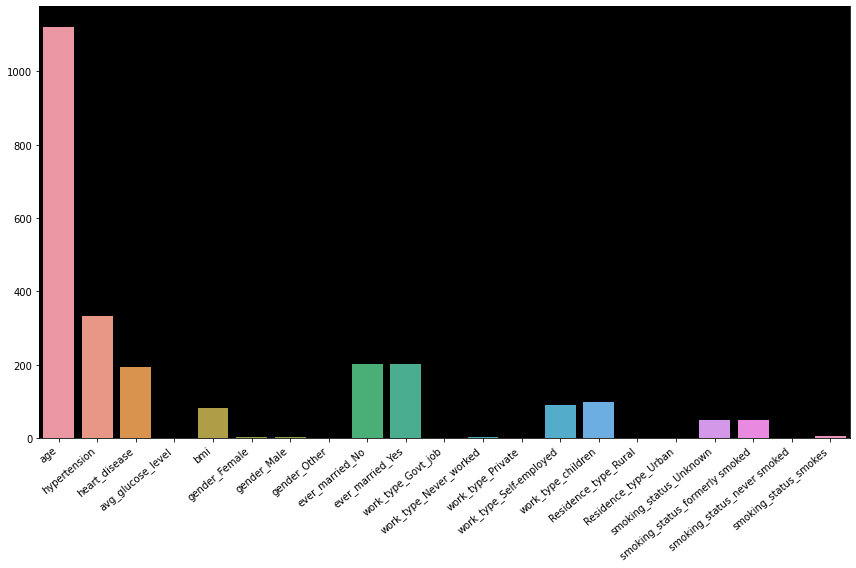

In [ ]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,8))
ax=sns.barplot(x=X.columns,y=fs.scores_)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    From the above bar garph we can see the feature importance and we will include only those features which are more important for our model.</p>
    </html>

In [ ]:
X1=X[['age','hypertension','heart_disease','ever_married_Yes','work_type_Self-employed','work_type_children','smoking_status_formerly smoked','smoking_status_Unknown']]

### Splitting our dataset into train and test set <a class="anchor" id="sec4"></a>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,stratify=y,random_state=32)

### SMOTE(Synthetic Minority Oversampling Technique)<a class="anchor" id="sec9"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Under Sampling and Over Sampling-</b></p>
    <img src="https://lh6.googleusercontent.com/n33kWCxulUum6gl_SSImC7TGtBUs71b-BjOrzv1DPw0PJ8K7QPuo55B4DntBhuLL_RU=w2400" alt="Computer man" style="width:800px;height:300px;"/>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is SMOTE ?</b><br>
    Synthetic Minority Oversampling Technique or SMOTE is a technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.</p>
    </html>

### Applying Smote technique for making our data balance

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=2,k_neighbors=3,sampling_strategy='minority')

In [ ]:
X_train,y_train=sm.fit_resample(X_train,y_train)


### Count plot after applying SMOTE <a class="anchor" id="sec9.1"></a>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


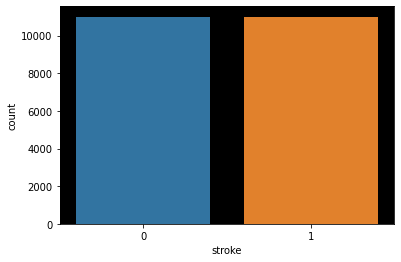

In [ ]:
sns.countplot(y_train)
plt.show()

### Feature Scaling <a class="anchor" id="sec5"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Feature Scaling-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is Normalization?</b><br>
    Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.<br>
    <img src="https://lh6.googleusercontent.com/_y4dtry_8ImYjqLTXcH68ZpB1--Iea2n2m08d-GLpbTQ4VSREwy3v1PcX8dGQwLE9PE=w2400" alt="Computer man" style="width:800px;height:200px;"/><br>
    <b>What is Standardization?</b><br>
    Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.<br><img src="https://lh3.googleusercontent.com/q9a09LIGXoRO_1bdgFw0C3WcjyEhpDnJ3C8COL65yn0gWhRTtFm5US-Q33aAQujuETQ=w2400" alt="Computer man" style="width:800px;height:200px;"/></p>

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    Here we are going to use <b>Standardization</b>.</p>
    </html>

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Modeling <a class="anchor" id="sec6"></a>

### Performance Measures for Multi-Class

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>Confusion Matrix-</b><br>
    <img src="https://lh6.googleusercontent.com/WJEnoqTTOGL2LQynBs3nG4uA47_UB5imRkgfTKVwYaTq8Zmmi-_Ns7SEPI90VVjt5-I=w2400" alt="Computer man" style="width:800px;height:300px;"/>
    <br>
    <b>Other Multiclass Classification Metrics:</b><br>
    <img src="https://lh6.googleusercontent.com/rLIeVDOU5r4vAL1wPwWM0NtxKMUTzgkgOVZkkGiXxMC1VtCimZSrwLTYeEOap5Js8MY=w2400" alt="Computer man" style="width:800px;height:300px;"/>
    </p>
    </html>

### K-fold Cross Validation

<html>
<p style="color:chocolate;font-size:150%;">
    <b>K-fold Cross validation-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is Cross Validation?</b><br>
    Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.<br>
    <img src="https://lh6.googleusercontent.com/sp2oloxXrxErMlLFkU3p0TqWYUh4O-9OjhQxBk8RcbKyYrxfPSSfGqw4KU61Vw_Qq7A=w2400" alt="Computer man" style="width:800px;height:400px;"/>
    </html>

In [ ]:
#importing different classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#creating dictionary for storing different models accuracy
model_comparison={}

### Logistic Regression <a class="anchor" id="sec6.0"></a>

In [ ]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Logistic Regression']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 78.93%
Model F1-Score : 72.75%
Cross Val Accuracy: 81.57 %
Cross Val Standard Deviation: 0.68 %
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      2944
           1       0.74      0.13      0.23       882

    accuracy                           0.79      3826
   macro avg       0.77      0.56      0.55      3826
weighted avg       0.78      0.79      0.73      3826



In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, make_scorer
from imblearn.over_sampling import SMOTE

# Load datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Separate features and target
X = train_data.drop(columns=['stroke', 'id'])
y = train_data['stroke']

# Combine train and test data for consistent preprocessing
combined = pd.concat([X, test_data.drop(columns=['id'])], keys=['train', 'test'])

# Handle categorical features
combined = pd.get_dummies(combined, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Split back into train and test sets
X = combined.xs('train')
X_test = combined.xs('test')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X_test = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Balance the dataset with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split resampled data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Set up the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

# Define a custom scorer to prioritize recall
recall_scorer = make_scorer(recall_score)

# Initialize Logistic Regression model
classifier = LogisticRegression(max_iter=1000, random_state=42)

# Use GridSearchCV to find the best parameters for recall improvement
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring=recall_scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model based on recall score
best_model = grid_search.best_estimator_

# Evaluate on validation set
y_pred = best_model.predict(X_val)

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred) * 100
f1 = f1_score(y_val, y_pred, average='weighted') * 100
recall = recall_score(y_val, y_pred) * 100
cross_val_accuracy = cross_val_score(estimator=best_model, X=X_train, y=y_train, cv=5).mean() * 100
cross_val_std = cross_val_score(estimator=best_model, X=X_train, y=y_train, cv=5).std() * 100

# Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Model Accuracy: {accuracy:.2f}%")
print(f"Model F1-Score: {f1:.2f}%")
print(f"Model Recall: {recall:.2f}%")
print(f"Cross Val Accuracy: {cross_val_accuracy:.2f}%")
print(f"Cross Val Standard Deviation: {cross_val_std:.2f}%")
print(classification_report(y_val, y_pred, zero_division=1))

# Store results in a dictionary for comparison
model_comparison = {
    'Logistic Regression': [accuracy, f1, recall, cross_val_accuracy, cross_val_std]
}


Best Parameters: {'C': 0.01, 'class_weight': None}
Model Accuracy: 82.54%
Model F1-Score: 82.53%
Model Recall: 85.27%
Cross Val Accuracy: 82.18%
Cross Val Standard Deviation: 0.77%
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      2983
           1       0.80      0.85      0.83      2886

    accuracy                           0.83      5869
   macro avg       0.83      0.83      0.83      5869
weighted avg       0.83      0.83      0.83      5869



### Decision Tree <a class="anchor" id="sec6.1"></a>

In [ ]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 82.28%
Model F1-Score : 77.39%
Cross Val Accuracy: 88.55 %
Cross Val Standard Deviation: 0.92 %
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      3126
           1       0.57      0.13      0.21       700

    accuracy                           0.82      3826
   macro avg       0.70      0.55      0.55      3826
weighted avg       0.79      0.82      0.77      3826



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

# Initialize Decision Tree model with 'entropy' criterion
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

# Predict on validation set
y_pred = classifier.predict(X_val)

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred) * 100
f1 = f1_score(y_val, y_pred, average='weighted') * 100
recall = recall_score(y_val, y_pred) * 100
cross_val_accuracy = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5).mean() * 100
cross_val_std = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5).std() * 100

# Print results
print(f"Model Accuracy: {accuracy:.2f}%")
print(f"Model F1-Score: {f1:.2f}%")
print(f"Model Recall: {recall:.2f}%")
print(f"Cross Val Accuracy: {cross_val_accuracy:.2f}%")
print(f"Cross Val Standard Deviation: {cross_val_std:.2f}%")
print(classification_report(y_val, y_pred, zero_division=1))

# Store results in dictionary for comparison
model_comparison['Decision Tree'] = [accuracy, f1, recall, cross_val_accuracy, cross_val_std]


Model Accuracy: 95.30%
Model F1-Score: 95.30%
Model Recall: 95.15%
Cross Val Accuracy: 95.16%
Cross Val Standard Deviation: 0.55%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2983
           1       0.95      0.95      0.95      2886

    accuracy                           0.95      5869
   macro avg       0.95      0.95      0.95      5869
weighted avg       0.95      0.95      0.95      5869



### KNN <a class="anchor" id="sec6.2"></a>

In [ ]:
classifier=classifier =KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['KNN']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 93.75%
Model F1-Score : 94.01%
Cross Val Accuracy: 67.82 %
Cross Val Standard Deviation: 2.95 %
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3693
           1       0.16      0.20      0.18       133

    accuracy                           0.94      3826
   macro avg       0.57      0.58      0.57      3826
weighted avg       0.94      0.94      0.94      3826



### Naive Bayes <a class="anchor" id="sec6.3"></a>

In [ ]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Naive Bayes']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 44.85%
Model F1-Score : 31.93%
Cross Val Accuracy: 68.05 %
Cross Val Standard Deviation: 2.97 %
              precision    recall  f1-score   support

           0       0.43      1.00      0.60      1570
           1       0.96      0.07      0.13      2256

    accuracy                           0.45      3826
   macro avg       0.69      0.53      0.36      3826
weighted avg       0.74      0.45      0.32      3826



### Support Vector Classifier <a class="anchor" id="sec6.4"></a>

In [ ]:
classifier=SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Support Vector Classifier']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 75.43%
Model F1-Score : 68.07%
Cross Val Accuracy: 82.42 %
Cross Val Standard Deviation: 0.53 %
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      2794
           1       0.79      0.12      0.21      1032

    accuracy                           0.75      3826
   macro avg       0.77      0.55      0.53      3826
weighted avg       0.76      0.75      0.68      3826



### Random Forest <a class="anchor" id="sec6.5"></a>

In [ ]:
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 82.25%
Model F1-Score : 77.34%
Cross Val Accuracy: 88.31 %
Cross Val Standard Deviation: 1.02 %
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      3119
           1       0.59      0.13      0.22       707

    accuracy                           0.82      3826
   macro avg       0.71      0.56      0.56      3826
weighted avg       0.79      0.82      0.77      3826



### Xg Boost <a class="anchor" id="sec6.6"></a>

In [ ]:
classifier = XGBClassifier(objective= 'binary:logistic')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 82.07%
Model F1-Score : 77.03%
Cross Val Accuracy: 88.24 %
Cross Val Standard Deviation: 0.98 %
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      3084
           1       0.68      0.14      0.24       742

    accuracy                           0.82      3826
   macro avg       0.75      0.56      0.57      3826
weighted avg       0.80      0.82      0.77      3826



### Stacking Regressor<a class="anchor" id="sec6.6"></a>

In [ ]:
estimators=[('logistic regression',LogisticRegression()),('SVC',SVC(kernel = 'rbf', random_state = 0)),('Decision Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)),('random forest',RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)),('Xgboost',XGBClassifier())]

In [ ]:
from sklearn.ensemble import StackingClassifier
model=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(),passthrough=True)
model.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Stacking Regressor']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 82.07%
Model F1-Score : 77.03%
Cross Val Accuracy: 88.24 %
Cross Val Standard Deviation: 0.98 %
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      3084
           1       0.68      0.14      0.24       742

    accuracy                           0.82      3826
   macro avg       0.75      0.56      0.57      3826
weighted avg       0.80      0.82      0.77      3826



### Model Comparison <a class="anchor" id="sec7"></a>

In [ ]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
KNN,93.75%,94.01%,67.82%,2.95%
Decision Tree,82.28%,77.39%,88.55%,0.92%
Random Forest,82.25%,77.34%,88.31%,1.02%
Xg Boost,82.07%,77.03%,88.24%,0.98%
Stacking Regressor,82.07%,77.03%,88.24%,0.98%
Logistic Regression,78.93%,72.75%,81.57%,0.68%
Support Vector Classifier,75.43%,68.07%,82.42%,0.53%
Naive Bayes,44.85%,31.93%,68.05%,2.97%


#### Maximum Accuracies in each Column <a class="anchor" id="sec7.1"></a>

In [ ]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
KNN,93.75%,94.01%,67.82%,2.95%
Decision Tree,82.28%,77.39%,88.55%,0.92%
Random Forest,82.25%,77.34%,88.31%,1.02%
Xg Boost,82.07%,77.03%,88.24%,0.98%
Stacking Regressor,82.07%,77.03%,88.24%,0.98%
Logistic Regression,78.93%,72.75%,81.57%,0.68%
Support Vector Classifier,75.43%,68.07%,82.42%,0.53%
Naive Bayes,44.85%,31.93%,68.05%,2.97%


#### Minimum Accuracies in each Column <a class="anchor" id="sec7.2"></a>

In [ ]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
KNN,93.75%,94.01%,67.82%,2.95%
Decision Tree,82.28%,77.39%,88.55%,0.92%
Random Forest,82.25%,77.34%,88.31%,1.02%
Xg Boost,82.07%,77.03%,88.24%,0.98%
Stacking Regressor,82.07%,77.03%,88.24%,0.98%
Logistic Regression,78.93%,72.75%,81.57%,0.68%
Support Vector Classifier,75.43%,68.07%,82.42%,0.53%
Naive Bayes,44.85%,31.93%,68.05%,2.97%


### Final Model(XgBoost)  for submission <a class="anchor" id="sec8"></a>

In [ ]:
estimator=XGBClassifier(objective= 'binary:logistic')
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [ ]:
grid_search.fit(X,y)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [ ]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]
test=test.iloc[:,1:]
var=list(df.select_dtypes(include=['float64']).columns)
X=outlier_treating(X,var)
test=outlier_treating(test,var)
X=pd.get_dummies(X,drop_first=False)
test=pd.get_dummies(test,drop_first=False)
X=X[['age','hypertension','heart_disease','ever_married_Yes','work_type_Self-employed','work_type_children','smoking_status_formerly smoked','smoking_status_Unknown']]
test=test[['age','hypertension','heart_disease','ever_married_Yes','work_type_Self-employed','work_type_children','smoking_status_formerly smoked','smoking_status_Unknown']]
sm = SMOTE(random_state=2,k_neighbors=3,sampling_strategy='minority')
X,y=sm.fit_resample(X,y)
sc=StandardScaler()
X=sc.fit_transform(X)
test=sc.transform(test)
classifier=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=180,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)
classifier.fit(X,y)
y_pred=classifier.predict_proba(test)
sub['stroke']=y_pred[:,1]
sub.to_csv('file.csv')

<html>
<img src="https://media3.giphy.com/media/vIBFxsppf4Bdh3ZKDa/giphy.gif?cid=6c09b9525260d6f09b014a5202ea0c90aa1526d656215736&rid=giphy.gif&ct=s" alt="Computer man" style="width:400px;height:300px;"/>
</html>